In [2]:
#Forex prediction data analysis
#Objectives:
#1. Load and preporocess the dataset
#2. Inspect the data for empty values, wrong datatypes, wrong formats and duplicates and outliers
#3. Analyze the data to find patterns and relationships
#4. Visualize the data to understand trends and distributions
#5. Evaluate the performance of the module using appropriate metrics
#6. Identify correlations in EUR/USD exchange rates movements
#7. Save the cleaned and processed data for future use

In [3]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
#Load the dataset and perform initial inspection
df = pd.read_csv("forex_predictions_data.csv")

#Initial inspection
df.head()

,Date,Open,High,Low,Close,Volume,Predicted_Close,Currency_Pair,Signal,Confidence
0,2024-01-01,1.18727,1.92461,0.85312,1.18154,2201,1.22984,EUR/USD,Hold,0.90
1,2024-01-02,1.47536,1.82881,0.54067,1.32296,error,1.03797,EUR/USD,Sell,NaN
2,2024-01-03,1.36600,1.78415,0.54242,1.28539,4420,1.03888,EUR/USD,Sell,NaN
3,2024-01-04,1.29933,1.54684,0.99332,1.17805,4079,1.00117,EUR/USD,Sell,0.64
4,2024-01-05,1.07801,1.68386,0.68714,NaN,1832,1.48385,EUR/USD,Sell,0.68


In [5]:
#More initial inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             226 non-null    object 
 1   Open             224 non-null    float64
 2   High             220 non-null    float64
 3   Low              225 non-null    float64
 4   Close            212 non-null    float64
 5   Volume           226 non-null    object 
 6   Predicted_Close  222 non-null    float64
 7   Currency_Pair    229 non-null    object 
 8   Signal           227 non-null    object 
 9   Confidence       218 non-null    float64
dtypes: float64(6), object(4)
memory usage: 18.0+ KB


In [6]:
#Descriptive statistics of our data
df.describe()

,Open,High,Low,Close,Predicted_Close,Confidence
count,224.000000,220.000000,225.000000,212.000000,222.000000,218.000000
mean,1.239946,1.753113,0.750030,1.245072,1.250415,0.756468
std,0.148956,0.147816,0.150434,0.140594,0.156102,0.135125
min,1.002530,1.505420,0.505680,1.002320,1.000120,0.500000
25%,1.111860,1.638832,0.614320,1.122535,1.115280,0.652500
50%,1.248105,1.763400,0.746310,1.235910,1.259605,0.760000
75%,1.365100,1.877682,0.877570,1.368805,1.392158,0.870000
max,1.493440,1.995250,0.999860,1.498440,1.499680,1.000000


In [7]:
#Shape of the given data

df.shape

(229, 10)

In [8]:
#Handling bad data: empty cells, wrong data, wrong formate, duplicates and outliers
#Emptry values
#Check for total number of misssing values
df.isnull().sum()

Date                3
Open                5
High                9
Low                 4
Close              17
Volume              3
Predicted_Close     7
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64

In [9]:
#Handle missing values
#for non numeric values fill them with Code numeric values e.g if gender is F/M use F = 0, M = 1

#for numeric columns: use mean and median! avoid using the average
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric,coercing errors to NaN
        #Fill NaN values with the mean of the column
        df[col] = df[col].fillna(df[col].median())

#For categorical columns, we can fill missing values using the mode
categorical_cols = ['Signal']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0]) #Fill Nan values with mode of the column

#Check again for missing values
print('Missing values after handling: ')
print(df.isnull().sum())



Missing values after handling: 
Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64


In [10]:
#Data in wrong format
#Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

#Handle volume column with 'error' values
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

#fill NaN values in 'Volume' with median
df['Volume'] = df['Volume'].fillna(df['Volume'].median())

#clean the confidence column
df['Confidence'] = df['Confidence'].fillna(df['Confidence'].median())


In [11]:
#Wrong data
price_col = ['Open', 'High', 'Low', 'Close', 'Predicted_Close']
for col in price_col:
    if col in df.columns:
        #Remove extreme outliers (e.g: values beyond 3 standard deviations): outliers mean data that is way out of the range of the kind of data we're dealing with
        mean = df[col].mean()
        std_dev = df[col].std()
        df[col] = np.where((df[col]< mean - 3*std_dev) | (df[col] > mean + 3*std_dev), np.nan, df[col]) 

#Fill NaN values in price columns with the median
        df[col] = df[col].fillna(df[col].median())

#Check data types after conversion   
print(df.dtypes)

Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                    float64
Predicted_Close           float64
Currency_Pair              object
Signal                     object
Confidence                float64
dtype: object


In [12]:
#Duplicates
#Check for duplicates
print("Number of duplicate rows: ", df.duplicated().sum())


Number of duplicate rows:  10


In [13]:
#Remove duplicates
df = df.drop_duplicates()
print('Number of rows after removing duplicates: ', df.shape[0])

#Check for duplicate dates
print('Number of duplicate dates: ',df.duplicated('Date').sum())

Number of rows after removing duplicates:  219
Number of duplicate dates:  2


In [14]:
#Final clean dataset
df.info()
#Check empty values again
print('Missing values after cleaning: ')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             216 non-null    datetime64[ns]
 1   Open             219 non-null    float64       
 2   High             219 non-null    float64       
 3   Low              219 non-null    float64       
 4   Close            219 non-null    float64       
 5   Volume           219 non-null    float64       
 6   Predicted_Close  219 non-null    float64       
 7   Currency_Pair    219 non-null    object        
 8   Signal           219 non-null    object        
 9   Confidence       219 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 18.8+ KB
Missing values after cleaning: 
Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair

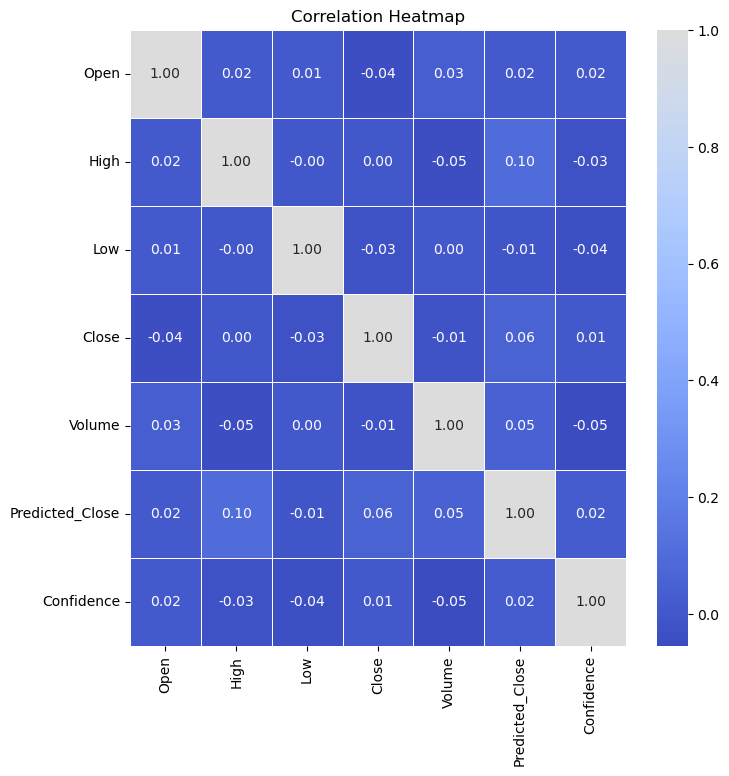

In [15]:
#Analysis
#Correlation Analysis
#Calculate correlation matrix

corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']].corr()

#Plot the correlation heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

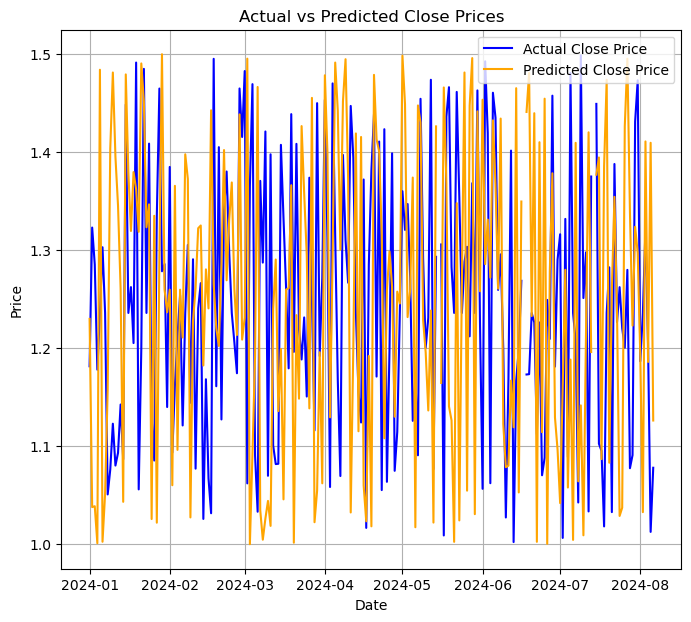

In [16]:
#Actual vs Predicted Close Prices
plt.figure(figsize=(8, 7))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['Predicted_Close'], label='Predicted Close Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 0, 'Signal Type')

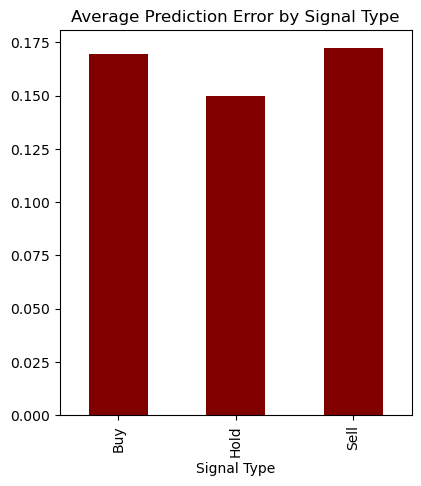

In [17]:
#Signal Performance Analysis
df['Prediction_Error'] = abs(df['Close'] - df['Predicted_Close'])

#Analyze error by signal type
signal_error = df.groupby('Signal')['Prediction_Error'].mean()
signal_confidence = df.groupby('Signal')['Confidence'].mean()

#Plotting the average prediction error by signal type
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
signal_error.plot(kind='bar', color='maroon')
plt.title('Average Prediction Error by Signal Type')
plt.xlabel('Signal Type')

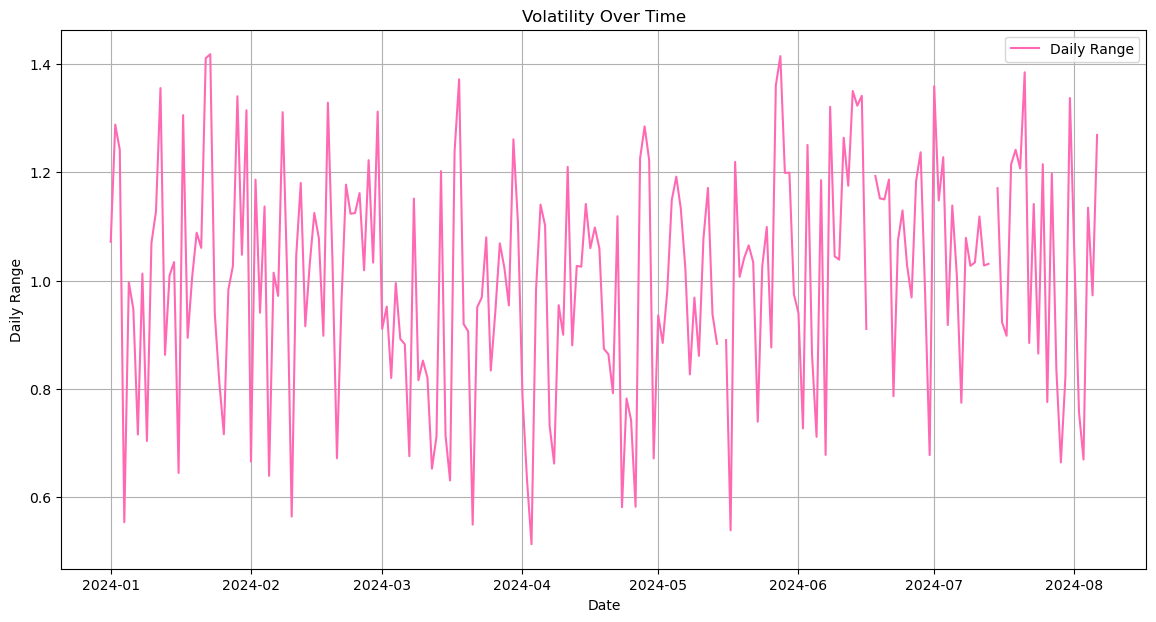

In [18]:
#Volatility Analysis
#Calculate daily returns
df['Daily_Range'] = df['High'] - df['Low']

#Plot volatility over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Daily_Range'], label='Daily Range', color='hotpink')
plt.xlabel('Date')
plt.ylabel('Daily Range')
plt.title('Volatility Over Time')
plt.legend()
plt.grid()
plt.show()